In [ ]:
# This cell downloads the libraries on my device first then imports them
# (/dev/null 2>&1 omits the output because it's too long)
%pip install numpy matplotlib networkx itertools > /dev/null 2>&1

import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx   # To draw the trees
import itertools


print("Downloaded and imported libraries successfully.")

Note: you may need to restart the kernel to use updated packages.


The system cannot find the path specified.


Downloaded and imported libraries successfully.


# LCS Implementation:

In [54]:
def longest_common_subsequences(x, y):
    """
    Gives the length of the longest common substring between strings x and y
    Inputs
    ----------
    x, y: strings
    Strings to compute the LCS
    Returns
    ----------
    all_lcs: tuple ([LCS1, LCS2, ...], len(LCS1))
    Tuple of a list of all the possible LCS and the corresponding length (size)
    """
    len_x, len_y = len(x), len(y)

    dp_table = [[0] * (len_y + 1) for _ in range(len_x + 1)]

    # Fill the DP table
    for i in range(1, len_x + 1):
        for j in range(1, len_y + 1):
            if x[i - 1] == y[j - 1]:
                dp_table[i][j] = dp_table[i - 1][j - 1] + 1
                
            else:
                dp_table[i][j] = max(dp_table[i - 1][j], dp_table[i][j - 1])

    # Function to backtrack and find all LCS
    def backtrack(i, j):
        if i == 0 or j == 0:
            return {""}

        if x[i - 1] == y[j - 1]:
            return {s + x[i - 1] for s in backtrack(i - 1, j - 1)}

        else:
            lcs_set = set()

            if dp_table[i - 1][j] >= dp_table[i][j - 1]:
                lcs_set.update(backtrack(i - 1, j))

            if dp_table[i][j - 1] >= dp_table[i - 1][j]:
                lcs_set.update(backtrack(i, j - 1))

            return lcs_set

    # Get all LCS and the length of the LCS
    all_lcs = sorted(list(backtrack(len_x, len_y))) # I sorted it to pass the assert test cases because using a Set() gives a different order each session

    return all_lcs, dp_table[len_x][len_y]

In [55]:
# Test cases with different scenarios
x1, y1 = 'ABCBDAB', 'BDCABA'  # Multiple possible LCS
x2, y2 = 'abc', ''  # One empty string
x3, y3 = 'abc', 'a'  # Partial match
x4, y4 = 'abc', 'ac'  # Subsequence match
x5, y5 = 'aaa', 'aa'  # Repeated characters
x6, y6 = 'abcdef', 'abcdef'  # Identical strings
x7, y7 = 'xyz', 'abc'  # No common subsequence
x8, y8 = '', ''  # Both strings empty

# Used assert to test the function and added f-string to print the failed test cases
assert longest_common_subsequences(x1, y1) == (sorted(['BCBA', 'BDAB', 'BCAB']), 4), f"Failed for {x1}, {y1}, got {longest_common_subsequences(x1, y1)}"
assert longest_common_subsequences(x2, y2) == ([""], 0), f"Failed for {x2}, {y2}, got {longest_common_subsequences(x2, y2)}"
assert longest_common_subsequences(x3, y3) == (['a'], 1), f"Failed for {x3}, {y3}, got {longest_common_subsequences(x3, y3)}"
assert longest_common_subsequences(x4, y4) == (['ac'], 2), f"Failed for {x4}, {y4}, got {longest_common_subsequences(x4, y4)}"
assert longest_common_subsequences(x5, y5) == (['aa'], 2), f"Failed for {x5}, {y5}, got {longest_common_subsequences(x5, y5)}"
assert longest_common_subsequences(x6, y6) == (['abcdef'], 6), f"Failed for {x6}, {y6}, got {longest_common_subsequences(x6, y6)}"
assert longest_common_subsequences(x7, y7) == ([""], 0), f"Failed for {x7}, {y7}, got {longest_common_subsequences(x7, y7)}"
assert longest_common_subsequences(x8, y8) == ([""], 0), f"Failed for {x8}, {y8}, got {longest_common_subsequences(x8, y8)}"

print("The function passed all test cases")

The function passed all test cases


# Generating a 7x7 Matrix for the set_strings:

In [56]:
set_strings = [('A', 'ATGGTGCGAAAGCATCTCTTTTCGTGGCGTGATAAGTTTTATGGTATCCCCGGACGTTGGCTACTACAATTCTCCGAAGTATAAGTGAGTAGGATATGTCAATAACAAGAGGGGATGCGTGACGCATTAGCACCAACTGAATCAAACGATAACTAACGTGGTTTCAGTGAGCGTATGTGGCAAAGGATTGGATACATTTTTCGAGCACGTCTACATAATGACCGTGACAATACTGGAGACTCCGTACCGTCATCTTGACACTCCT'),
               ('B', 'TGGTGCGAAAGCATCTCTTTTCCGTGGCGTATAGTTTTATGGTATCCCCGGAACGCTGGCTACTACAATCTCCGAAGTATAGAGTGAGTAGATTTAATTAACAGAGGGCGTCGTTGACGCATTAGCACCAACTGAATCAACCGATAACTTAACGTGGGTTTCAGTGACTATAGGGCAAAGGATGAACATTTTCGAGCAGCTCTAATAATGAGCGTGACAATATGAATCCACACCGTCATCTTGAACTCCT'),
               ('C', 'TCTGTGCGATATACATCTCTATCGTTGCGGTATGTTTTATGTGCATCACCCCACGCGCTGGCTACAGTACAATCTGCTGGAAGTACTAGGTGGTAGTTAATAACTAGGGTGCGTCGTTGCGCATTACACAACTGGACAACCACTTAACTGGGGTAATCAGTGTTTAGGGCAGACAAGATGAAAACAAGTTTTCGAGCAGGCTCCTATAATGAGGACGGAACGTTAATAAATCCAACACCGCACTGCTTCGTAACCCT'),
               ('D', 'ATGAGGCGCAAAATTCTCTTTCTCGTGGCGCTGATTAAGTTTTATGTATCCCCGGACGTTGGCTACTGACAATTGCTCCGAAGTATAAAGTAGTAGGATATGTCAATAACAAAGACGGGGATAGCGTGACAGCATTAGAACGCAACTGGAATCAAACGTAACCTAAAGGGTTGTCAGGAGCGTATGTGGTCAAAAAGGATTGGATGACATTTTTCGACACGTCTACATAATGACCTGTGACAAACTAGGAGACCTCCTACTCGGTCAATCTTGACGACTCCT'),
               ('E', 'TGGTGCGATATACATCTCTTTTCGTGCGTATGTTTTATGGTGATCACCCGGAACCGCTGGCTACATACAATCTCTGGAAGTACTAGGTGGTAGTTTAATAACTAGAGGTGCGTCGTTGACGCATTACACAACTGGATCAACCGAACTTAACTGGGTATCAGTGATATAGGGCGACAAGATGAACAATTTTCGAGCAGCTCCTGAATAATGAGACGGAACGTATAATCCAACACCGTCACTGCTTCGAACCCT'),
               ('F', 'GGGGGAAAGCGATCCCTTATCGTGGCTGTGATAAGTTTTTATCGGGTATCCGCCGGACGTTGGCGTACTACAATTCTCCGAAGTTAAGTGAGTTAGGGATATAGTCAATAACAAGAGGGGATTGTCGTGACGCATAGCACACAACTGAATCAAATCGATAACTAAACGGGTTTCAGTAGAGCGTTGTGGCAAAGATTGGATACATTTTTCGCAGGACGTCTTACCTAATGACGTGGACAATAACTGGCAGACGTCCGTACCGTCATCTTGACCACTCCCT'),
               ('G', 'TGGTGCGATATACATCCTCTTTTCGTGCGTATGTTTTAGGTACACCGGATACGCCTGGCTTACAAGTACCAATCTCTGAGAAGTCACTGAGGTGGTAGTTTAATAACTAGAAGGGTGCGTCGGACGCATTCACACATACTGGATCAACCGAGACTTAACTGGGGTATCAGTGATTGATAGGGCGACAAGATATACAATTTTCGAGCAGCTCCCTGAATAAGTGAAGAACGGAGACGTATAATCCAACACGATTCACTGCTTCGAACCCT')]

In [57]:
def lcs_length_only(x, y):
    """Gives the length of the longest common substring between strings x and y
    Inputs
    ----------
    x, y: strings
    Strings to compute the LCS
    Returns
    ----------
    all_lcs: tuple ([LCS1, LCS2, ...], len(LCS1))
    Tuple of a list of all the possible LCS and the corresponding length (size)
    """
    len_x, len_y = len(x), len(y)

    dp_table = [[0] * (len_y + 1) for _ in range(len_x + 1)]

    # Fill the DP table
    for i in range(1, len_x + 1):
        for j in range(1, len_y + 1):
            if x[i - 1] == y[j - 1]:
                dp_table[i][j] = dp_table[i - 1][j - 1] + 1
                
            else:
                dp_table[i][j] = max(dp_table[i - 1][j], dp_table[i][j - 1])

    return dp_table[len_x][len_y]

In [58]:
def lcs_len_matrix(strings_list):
    """
    Create a 7x7 matrix of LCS lengths for all pairs of strings in set_strings
    
    Parameters:
    -----------
    set_strings : list of tuples
        List of (label, string) pairs
    
    Returns:
    --------
    numpy.ndarray
        2D array of LCS lengths
    """
    num_strings = len(strings_list)
    lcs_matrix = np.zeros((num_strings, num_strings), dtype=int)

    for i in range(num_strings):
        for j in range(i, num_strings):
            if i == j:
                lcs_matrix[i, j] = len(strings_list[i][1])
            else:
                lcs_matrix[i, j] = lcs_matrix[j, i] = lcs_length_only(strings_list[i][1], strings_list[j][1])
    
    return lcs_matrix

len_lcs_matrix = lcs_len_matrix(set_strings)
print(len_lcs_matrix)


[[265 235 199 252 214 251 212]
 [235 250 211 223 227 223 220]
 [199 211 257 197 234 195 229]
 [252 223 197 282 207 241 205]
 [214 227 234 207 252 205 243]
 [251 223 195 241 205 280 208]
 [212 220 229 205 243 208 269]]


In [59]:
num_strings = len(set_strings)

for i in range(num_strings):
    lcs_sum = 0  # Initialize the sum of LCS lengths for the current string
    
    for j in range(num_strings):
        if i != j:  # Exclude the length of the string itself
            lcs_sum += len_lcs_matrix[i, j]

    print(f"String {chr(65 + i)} sum: {lcs_sum}")

String A sum: 1363
String B sum: 1339
String C sum: 1265
String D sum: 1325
String E sum: 1330
String F sum: 1323
String G sum: 1317


# Percise Relationships

## Local Strategy

In [60]:
def calculate_edit_distance(str1, str2):
    """
    Calculate the Levenshtein (edit) distance between two strings using dynamic programming.

    This implementation uses an iterative bottom-up approach, which is more 
    memory-efficient and typically faster than the recursive approach.

    Parameters:
    -----------
    str1 : str
        The first string to compare
    str2 : str
        The second string to compare

    Returns:
    --------
    int
        The minimum number of single-character edits required to transform 
        str1 into str2
    """
    m, n = len(str1), len(str2)
    
    # A matrix of edit distances between substrings of str1 and str2
    dp = np.zeros((m + 1, n + 1), dtype=int)
    
    # Initialization (it requires i or j edits to turn an empty string into a string of length i or j)
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            # If characters are the same, no operation needed
            if str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                # Choose minimum of insert, delete, or replace
                dp[i][j] = 1 + min(
                    dp[i-1][j],      # deletion
                    dp[i][j-1],      # insertion
                    dp[i-1][j-1]     # replacement
                )
    
    # Return the bottom-right cell which contains the edit distance
    return dp[m][n]

def compute_edit_distance_matrix(strings):
    """
    Compute the edit distance matrix for a list of strings.

    Parameters:
    -----------
    strings : list
        A list of strings to compare

    Returns:
    --------
    numpy.ndarray
        A symmetric matrix of edit distances between all pairs of strings
    """
    num_strings = len(strings)
    
    edit_distance_matrix = np.zeros((num_strings, num_strings), dtype=int)
    
    # Compute distances, taking advantage of matrix symmetry
    for i in range(num_strings):
        for j in range(i+1, num_strings):
            distance = calculate_edit_distance(strings[i], strings[j])
            edit_distance_matrix[i][j] = distance
            edit_distance_matrix[j][i] = distance
    
    return edit_distance_matrix

strings = [s[1] for s in set_strings]
edit_distance_matrix = compute_edit_distance_matrix(strings)
print(edit_distance_matrix)

[[  0  40  97  41  77  38  91]
 [ 40   0  73  76  44  73  71]
 [ 97  73   0 111  37 113  61]
 [ 41  76 111   0 100  69 109]
 [ 77  44  37 100   0  99  35]
 [ 38  73 113  69  99   0 106]
 [ 91  71  61 109  35 106   0]]


In [9]:
num_strings = len(strings)

for i in range(num_strings):
    edit_distance_sum = 0  # Initialize the sum of Edit Disrance for the current string
    
    for j in range(num_strings):
        edit_distance_sum += edit_distance_matrix[i, j]

    print(f"String {chr(65 + i)} sum: {edit_distance_sum}")

String A sum: 384
String B sum: 377
String C sum: 492
String D sum: 506
String E sum: 392
String F sum: 498
String G sum: 473


In [10]:
def build_greedy_binary_tree(strings):
    """
    Build the best greedy perfect binary tree based on edit distances.

    Parameters:
    -----------
    strings : list
        List of strings representing genes.

    Returns:
    --------
    list
        Tree represented as a list of tuples (node, left_child, right_child).
    """
    # Variables that define the tree structure
    edit_distance_matrix = compute_edit_distance_matrix(strings)
    num_strings = len(strings)

    row_sums = [sum(edit_distance_matrix[i]) for i in range(num_strings)]
    root_index = row_sums.index(min(row_sums))

    # Build the tree
    visited = set()
    tree = []
    
    visited.add(root_index)

    def greedy_assign(node_index):
        """
        Greedily assign the two closest children based on edit distance.

        Parameters:
        -----------
        node_index : int
            Index of the current node in the tree.
        """

        def find_closest_child(node_index):
            """
            Find the closest child to the current node.

            Parameters:
            -----------
            node_index : int
                Index of the current node in the tree.

            Returns:
            --------
            int
                Index of the closest child
            """
            closest_child_value = float('inf')
            closest_child_idx = None

            for i in range(num_strings):
                if i != node_index and i not in visited:
                    if closest_child_idx is None or edit_distance_matrix[node_index, i] < closest_child_value:
                        closest_child_value = edit_distance_matrix[node_index, i]
                        closest_child_idx = i
            
            return closest_child_idx

        left_child = find_closest_child(node_index)
        visited.add(left_child)

        right_child = find_closest_child(node_index)
        visited.add(right_child)


        # Add the current node and its children to the tree
        tree.append((chr(65 + node_index), 
                     chr(65 + left_child) if left_child is not None else None, 
                     chr(65 + right_child) if right_child is not None else None))
        
        # Recursively assign children to the left and right nodes
        if left_child is not None:
            greedy_assign(left_child)
        if right_child is not None:
            greedy_assign(right_child)

    # Start from the root node
    greedy_assign(root_index)

    return tree

In [11]:
strings = [s[1] for s in set_strings]
tree = build_greedy_binary_tree(strings)

# Output the tree structure
for node, left, right in tree:
    print(f"Node: {node}, Left Child: {left}, Right Child: {right}")

Node: B, Left Child: A, Right Child: E
Node: A, Left Child: F, Right Child: D
Node: F, Left Child: G, Right Child: C
Node: G, Left Child: None, Right Child: None
Node: C, Left Child: None, Right Child: None
Node: D, Left Child: None, Right Child: None
Node: E, Left Child: None, Right Child: None


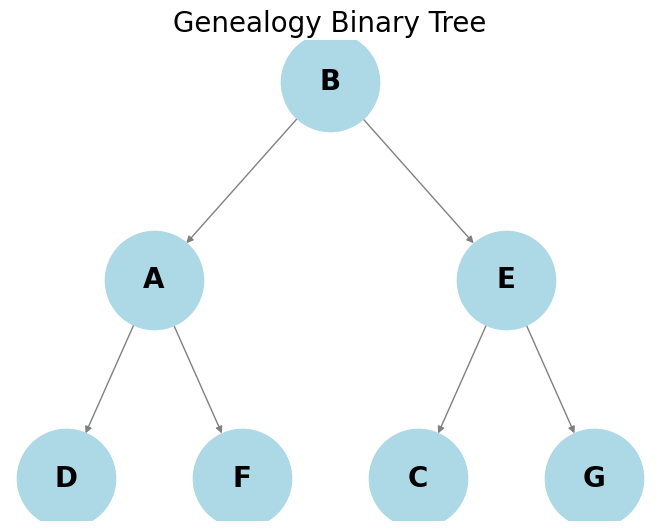

In [12]:
# Define the tree structure using tubles
edges = [
    ("B", "A"),  # Parent to Children
    ("B", "E"),
    ("A", "D"),  # Child to Grandchildren
    ("A", "F"),
    ("E", "C"),
    ("E", "G")
]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Define node positions for a binary tree layout
pos = {
    "B": (0, 3),     # Parent at the top
    "A": (-1, 2),    # Child 1
    "E": (1, 2),     # Child 2
    "D": (-1.5, 1),  # Grandchild of A
    "F": (-0.5, 1),  # Grandchild of A
    "C": (0.5, 1),   # Grandchild of E
    "G": (1.5, 1),   # Grandchild of E
}

plt.figure()
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=5000,
    node_color="lightblue",
    font_size=20,
    font_weight="bold",
    arrowsize=10,
    edge_color="gray"
)
plt.title("Genealogy Binary Tree", fontsize=20)
plt.show()

## Global Strategy

In [13]:
# Generate all possible perfect binary trees for a given set of strings
def generate_perfect_binary_trees(strings):
    """
    Generate all possible perfect binary trees for a given set of strings.
    
    Parameters:
    -----------
    strings : list
        List of strings that will be nodes.
        
    Yields:
    -------
    list
        A list representing a perfect binary tree with the given strings.
    """
    n = len(strings)
    trees = []

    for perm in itertools.permutations(strings):
        tree = []

        for i in range(n):
            left = 2 * i + 1
            right = 2 * i + 2
            tree.append((
                perm[i],  # Current node
                perm[left] if left < n else None,  # Left child
                perm[right] if right < n else None  # Right child
            ))

        trees.append(tree)

    return trees

# Score the tree using the precomputed edit distance matrix
def score_tree(tree, string_indices, scores_matrix):
    """
    Calculate the total edit distance score for a given tree.
    
    Parameters:
    -----------
    tree : list
        Tree representation where each node is (node_string, left_child, right_child).
    string_indices : dict
        A mapping of node strings to their indices in the edit distance matrix.
        
    Returns:
    --------
    int
        Total edit distance score for the tree.
    """
    total_score = 0

    for node, left, right in tree:
        if left:
            total_score += scores_matrix[string_indices[node]][string_indices[left]]

        if right:
            total_score += scores_matrix[string_indices[node]][string_indices[right]]

    return total_score

# Find the best tree by evaluating all possible perfect binary trees
def find_optimal_tree(set_strings):
    """
    Find the perfect binary tree with the lowest total edit distance.
    
    Parameters:
    -----------
    set_strings : list of tuples
        List of (label, string) tuples.
    
    Returns:
    --------
    tuple
        (Best tree, lowest score)
    """
    strings = [s[0] for s in set_strings]
    string_indices = {strings[i]: i for i in range(len(strings))}

    matrix = compute_edit_distance_matrix([s[1] for s in set_strings])
    # Track the best tree
    best_tree = None
    lowest_score = float('inf')

    # Evaluate all possible trees
    for tree in generate_perfect_binary_trees(strings):
        current_score = score_tree(tree, string_indices, matrix)
        if current_score < lowest_score:
            lowest_score = current_score
            best_tree = tree

    return best_tree, lowest_score

In [ ]:
best_tree, lowest_score = find_optimal_tree(set_strings)

print("Optimal Tree Structure:")
for node in best_tree:
    print(f"Node: {node[0]}, Left Child: {node[1]}, Right Child: {node[2]}")
print(f"\nLowest Total Edit Distance Score: {lowest_score}")

Optimal Tree Structure:
Node: B, Left Child: A, Right Child: E
Node: A, Left Child: D, Right Child: F
Node: E, Left Child: C, Right Child: G
Node: D, Left Child: None, Right Child: None
Node: F, Left Child: None, Right Child: None
Node: C, Left Child: None, Right Child: None
Node: G, Left Child: None, Right Child: None

Lowest Total Edit Distance Score: 235


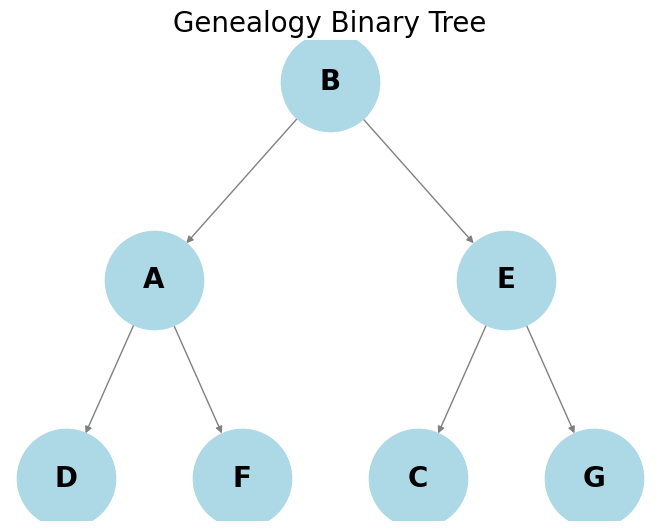

In [15]:
# Define the tree structure using tubles
edges = [
    ("B", "A"),  # Parent to Children
    ("B", "E"),
    ("A", "D"),  # Child to Grandchildren
    ("A", "F"),
    ("E", "C"),
    ("E", "G")
]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Define node positions for a binary tree layout
pos = {
    "B": (0, 3),     # Parent at the top
    "A": (-1, 2),    # Child 1
    "E": (1, 2),     # Child 2
    "D": (-1.5, 1),  # Grandchild of A
    "F": (-0.5, 1),  # Grandchild of A
    "C": (0.5, 1),   # Grandchild of E
    "G": (1.5, 1),   # Grandchild of E
}

plt.figure()
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=5000,
    node_color="lightblue",
    font_size=20,
    font_weight="bold",
    arrowsize=10,
    edge_color="gray"
)
plt.title("Genealogy Binary Tree", fontsize=20)
plt.show()

# Complexity Analysis

In [16]:
def scaling_experiment(func, sizes):
    execution_times =  []

    strings = []
    for i in range(sizes[-1]):
        strings.append("".join(np.random.choice(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"), 10)))
    
    set_strings = [(str(i), strings[i]) for i in range(sizes[-1])]

    for n in sizes:

        execution_time = 0

        for _ in range(10):
            start = time.time()
            func(set_strings[:n])
            execution_time += time.time() - start
        
        execution_times.append(execution_time/10)

    return sizes, execution_times

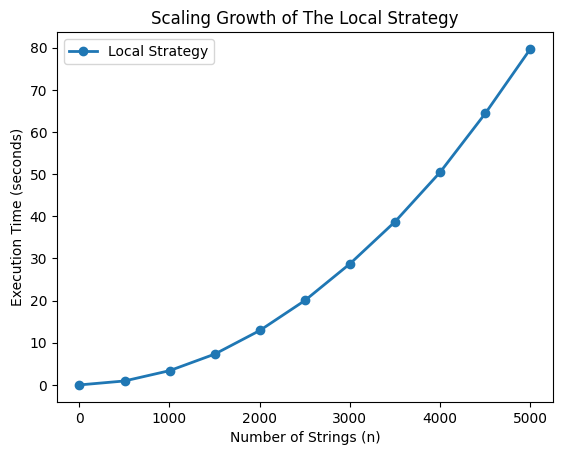

In [17]:
local_sizes, local_times = scaling_experiment(build_greedy_binary_tree, range(3, 5004, 500))

# Plot Results
plt.plot(local_sizes, local_times, label="Local Strategy", marker = 'o', linewidth=2)
plt.xlabel("Number of Strings (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Scaling Growth of The Local Strategy")
plt.legend()
plt.show()

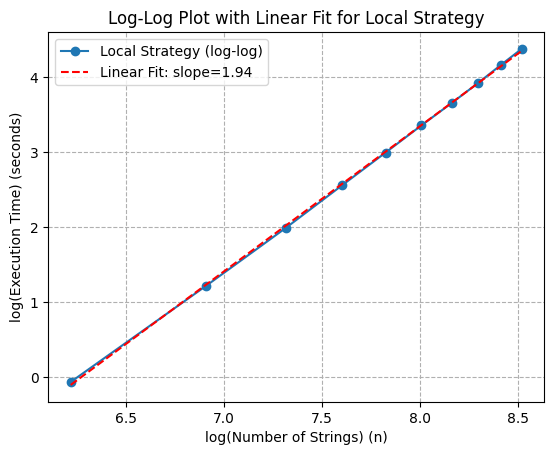

In [44]:
log_local_sizes = np.log(local_sizes[1:])
log_local_times = np.log(local_times[1:]) # I excluded the first element to avoid log(0)

# Fit a linear model in log-log space
slope, intercept = np.polyfit(log_local_sizes, log_local_times, 1)
fitted_log_times = intercept + slope * log_local_sizes

# Plotting
plt.plot(log_local_sizes, log_local_times, 'o-', label="Local Strategy (log-log)")
plt.plot(log_local_sizes, fitted_log_times, '--', label=f"Linear Fit: slope={slope:.2f}", color='red')

plt.xlabel("log(Number of Strings) (n)")
plt.ylabel("log(Execution Time) (seconds)")
plt.title("Log-Log Plot with Linear Fit for Local Strategy")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


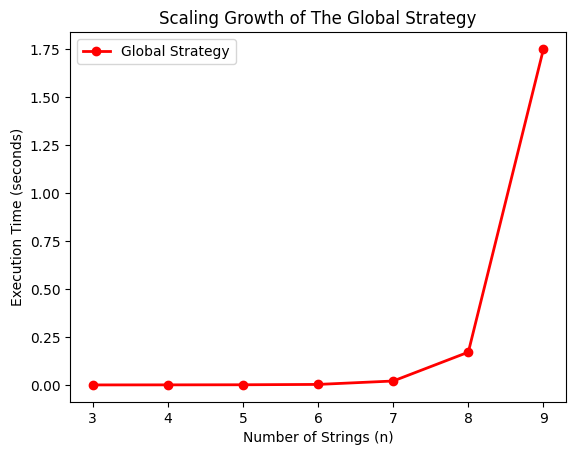

In [ ]:
global_sizes, global_times = scaling_experiment(find_optimal_tree, range(3, 10))

# Plotting
plt.plot(global_sizes, global_times, label="Global Strategy", marker = 'o', color = 'r', linewidth=2)
plt.xlabel("Number of Strings (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Scaling Growth of The Global Strategy")
plt.legend()
plt.show()

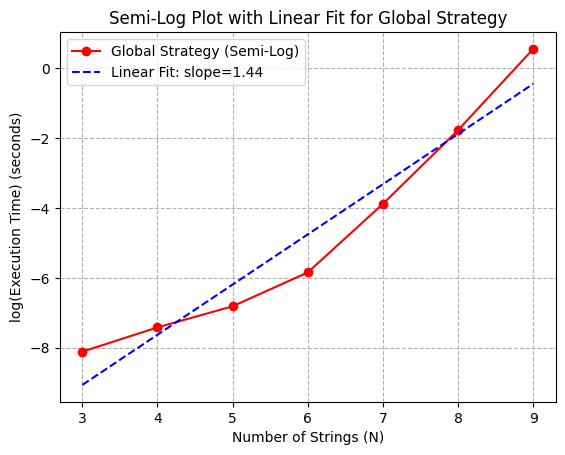

In [48]:
log_global_times = np.log(global_times)

# Fit a linear model in log-log space
slope, intercept = np.polyfit(global_sizes, log_global_times, 1)

fitted_log_times = intercept + slope * global_sizes

# Plotting
plt.plot(global_sizes, log_global_times, 'o-', label="Global Strategy (Semi-Log)", color='red')
plt.plot(global_sizes, fitted_log_times, 'b--', label=f"Linear Fit: slope={slope:.2f}")

plt.xlabel("Number of Strings (N)")
plt.ylabel("log(Execution Time) (seconds)")
plt.title("Semi-Log Plot with Linear Fit for Global Strategy")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

In [21]:
def scaling_experiment_SL(func, string_lengths):
    execution_times_SL = []

    for M in string_lengths:
        strings = ["".join(np.random.choice(list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"), M)) for _ in range(10)]
        execution_time = 0

        for _ in range(5):
            start = time.time()
            func(strings)
            execution_time += time.time() - start

        execution_times_SL.append(execution_time / 5)

    return string_lengths, execution_times_SL

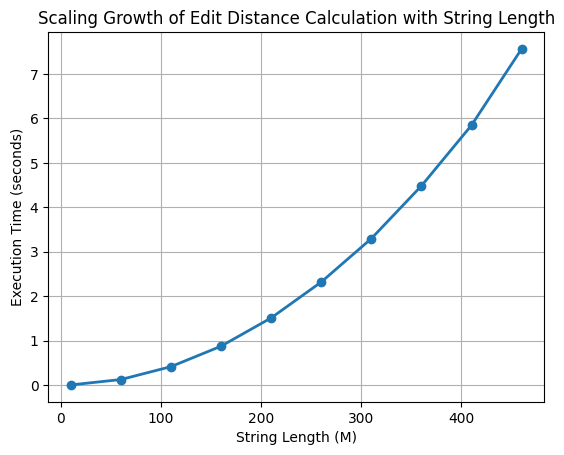

In [22]:
string_lengths, local_times_SL = scaling_experiment_SL(build_greedy_binary_tree, range(10, 501, 50))

# Plot Results
plt.plot(string_lengths, local_times_SL, marker='o', linewidth=2)
plt.xlabel("String Length (M)")
plt.ylabel("Execution Time (seconds)")
plt.title("Scaling Growth of Edit Distance Calculation with String Length")
plt.grid()
plt.show()

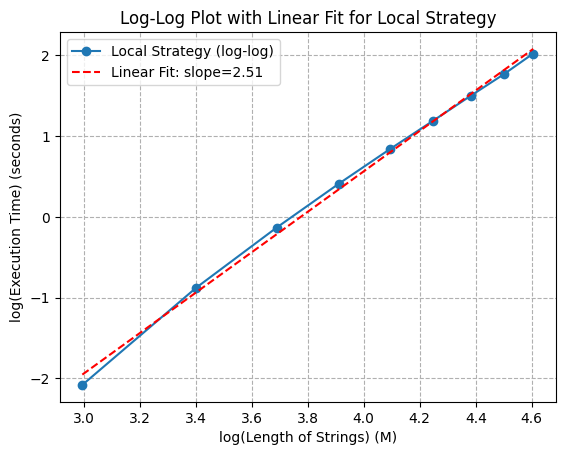

In [50]:
log_string_lengths = np.log(string_lengths[1:])
log_local_times_SL = np.log(local_times_SL[1:]) # I excluded the first element to avoid log(0)

# Fit a linear model in log-log space
slope, intercept = np.polyfit(log_string_lengths, log_local_times_SL, 1)
fitted_log_times = intercept + slope * log_string_lengths

# Plotting
plt.plot(log_string_lengths, log_local_times_SL, 'o-', label="Local Strategy (log-log)")
plt.plot(log_string_lengths, fitted_log_times, '--', label=f"Linear Fit: slope={slope:.2f}", color='red')

plt.xlabel("log(Length of Strings) (M)")
plt.ylabel("log(Execution Time) (seconds)")
plt.title("Log-Log Plot with Linear Fit for Local Strategy")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()


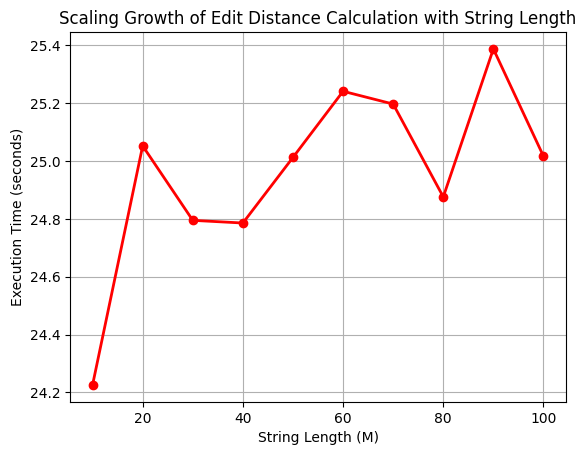

In [23]:
string_lengths, global_times_SL = scaling_experiment_SL(find_optimal_tree, range(10, 101, 10))

# Plot Results
plt.plot(string_lengths, global_times_SL, color = "r", marker='o', linewidth=2)
plt.xlabel("String Length (M)")
plt.ylabel("Execution Time (seconds)")
plt.title("Scaling Growth of Edit Distance Calculation with String Length")
plt.grid()
plt.show()

# Probability Estimation

In [ ]:
def calculate_edit_operations_general(str1, str2):
    """
    Calculate the number of insertions, deletions, and mutations required to transform str1 into str2,
    and the total number of positions where a mutation can happen.

    Parameters:
    -----------
    str1 (str): The first string.
    str2 (str): The second string.

    Returns:
    --------
    tuple: A tuple containing the number of insertions, deletions, mutations, and total alignment positions.
    """
    m, n = len(str1), len(str2)
    dp = np.zeros((m + 1, n + 1), dtype=int)


    for i in range(m + 1):
        dp[i][0] = i

    for j in range(n + 1):
        dp[0][j] = j

    # Fill the DP table for the remaining cells using a bottom-up approach
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:  
                # If the characters match, no operation is needed. Inherit the previous diagonal value.
                dp[i][j] = dp[i - 1][j - 1]
            else:
                # If characters don't match, take the minimum cost of insert, delete, or mutate
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])


    # Backtrack to count operations and alignment positions
    i, j = m, n
    insertions, deletions, mutations = 0, 0, 0
    total_positions = 0

    while i > 0 or j > 0: 
        total_positions += 1
        
        if i > 0 and dp[i][j] == dp[i - 1][j] + 1:  
            deletions += 1
            i -= 1  # Move up in the DP table (reduce str1 index)

        elif j > 0 and dp[i][j] == dp[i][j - 1] + 1:
            insertions += 1
            j -= 1  # Move left in the DP table (reduce str2 index)

        elif i > 0 and j > 0 and dp[i][j] == dp[i - 1][j - 1] + 1:
            mutations += 1
            i -= 1  # Move diagonally up-left (reduce both str1 and str2 indices)
            j -= 1

        else:
            # Move diagonally up-left in the DP table.
            i -= 1
            j -= 1


    return insertions, deletions, mutations, total_positions

def estimate_general_probabilities(strings):
    """
    Estimate the probabilities of insertions, deletions, and mutations between pairs of strings.
    It estimates teh probabilities of these operations if an operation is guaranteed and estimates
    the general probabilities based on the total number of positions (an operation is not guaranteed).

    Parameters:
    strings (list): A list of strings to compare.

    Returns:
    tuple: A tuple containing the probabilities of insertions, deletions, mutations, and general probabilities
           based on the total number of positions.
    """
    total_insertions = total_deletions = total_mutations = 0
    total_operations = 0
    total_positions = 0

    # Compare all pairs of strings
    for i in range(len(strings)):
        for j in range(i + 1, len(strings)):
            ins, dels, muts, positions = calculate_edit_operations_general(strings[i], strings[j])
            total_insertions += ins
            total_deletions += dels
            total_mutations += muts
            total_operations += ins + dels + muts
            total_positions += positions

    # Calculate probabilities
    P_insertion = total_insertions / total_operations if total_operations > 0 else 0
    P_deletion = total_deletions / total_operations if total_operations > 0 else 0
    P_mutation = total_mutations / total_operations if total_operations > 0 else 0

    G_P_insertion = total_insertions / total_positions if total_positions > 0 else 0
    G_P_deletion = total_deletions / total_positions if total_positions > 0 else 0
    G_P_mutation = total_mutations / total_positions if total_positions > 0 else 0

    return P_insertion, P_deletion, P_mutation, G_P_insertion, G_P_deletion, G_P_mutation

strings = [s[1] for s in set_strings]

# Estimate general probabilities
P_insertion, P_deletion, P_mutation, G_P_insertion, G_P_deletion, G_P_mutation = estimate_general_probabilities(strings)

print("Estimated Probabilities if an operation is guaranteed:")
print(f"Insertions: {P_insertion}")
print(f"Deletions: {P_deletion}")
print(f"Mutations: {P_mutation}")

print("\nEstimated General Probabilities based on the total number of positions:")
print(f"Insertions: {G_P_insertion}")
print(f"Deletions: {G_P_deletion}")
print(f"Mutations: {G_P_mutation}")

Estimated Probabilities if an operation is guaranteed:
Insertions: 0.4279308135810378
Deletions: 0.3420884048686739
Mutations: 0.22998078155028828

Estimated General Probabilities based on the total number of positions:
Insertions: 0.1083360363282517
Deletions: 0.08660395718456049
Mutations: 0.058222510541680185


I had the idea of also estimating the probabilites using the genealogy tree I designed using the global and local strategies. I think this will give us more insight since we are more confident about the relationships between the strings in this tree structure. So, the probabilities might be more accurate.

In [51]:
def estimate_probabilities_tree(set_strings, tree_structure):
    """
    Estimate the probabilities of insertions, deletions, and mutations in a tree structure.

    Parameters:
    -----------
    set_strings (list): A list of (label, string) pairs.
    tree_structure (list): A list of tuples representing the tree structure.

    Returns:
    --------
    tuple: A tuple containing the probabilities of insertions, deletions, and mutations.
    """
    total_insertions = total_deletions = total_mutations = 0
    total_positions = 0

    # Create a mapping of node labels to strings
    node_to_string = {node: string for node, string in set_strings}

    # Compare each parent with its left and right children
    for parent, left, right in tree_structure:
        if left:
            ins, dels, muts, positions = calculate_edit_operations_general(node_to_string[parent], node_to_string[left])
            total_insertions += ins
            total_deletions += dels
            total_mutations += muts
            total_positions += positions
        
        if right:
            ins, dels, muts, positions = calculate_edit_operations_general(node_to_string[parent], node_to_string[right])
            total_insertions += ins
            total_deletions += dels
            total_mutations += muts
            total_positions += positions

    # Calculate probabilities
    P_insertion = total_insertions / total_positions if total_positions > 0 else 0
    P_deletion = total_deletions / total_positions if total_positions > 0 else 0
    P_mutation = total_mutations / total_positions if total_positions > 0 else 0

    return P_insertion, P_deletion, P_mutation

# Tree Structure (parent, left child, right child)
tree_structure = [
    ('B', 'A', 'E'),
    ('A', 'D', 'F'),
    ('E', 'C', 'G'),
    ('D', None, None),
    ('F', None, None),
    ('C', None, None),
    ('G', None, None)
]

# Estimate probabilities
P_insertion, P_deletion, P_mutation = estimate_probabilities_tree(set_strings, tree_structure)
print("Estaming probabilities for the tree structure:")
print(f"Estimated General Probability of Insertions: {P_insertion}")
print(f"Estimated General Probability of Deletions: {P_deletion}")
print(f"Estimated General Probability of Mutations: {P_mutation}")

Estaming probabilities for the tree structure:
Estimated General Probability of Insertions: 0.08527131782945736
Estimated General Probability of Deletions: 0.04293381037567084
Estimated General Probability of Mutations: 0.011926058437686345


Calculate the average edit distance in the optimal tree I found to compare it with the probability results.

In [ ]:
def average_edit_percentage(set_strings, tree_structure):
    """
    Calculate the average percentage of edit distance relative to the string length for a tree structure.

    Parameters:
    -----------
    set_strings : list of tuples
        A list of (node, string) pairs representing the strings in the tree.
    tree_structure : list of tuples
        A list of (parent, left_child, right_child) tuples representing the tree structure.

    Returns:
    --------
    float
        The average percentage of edit distance relative to the string length.
    """
    total_percentage = 0
    total_comparisons = 0

    # Create a mapping of node labels to strings
    node_to_string = {node: string for node, string in set_strings}

    # Compare each parent with its left and right children
    for parent, left, right in tree_structure:
        parent_string = node_to_string[parent]

        if left:
            left_string = node_to_string[left]
            edit_distance = calculate_edit_distance(parent_string, left_string)
            percentage = edit_distance / len(parent_string)
            total_percentage += percentage
            total_comparisons += 1

        if right:
            right_string = node_to_string[right]
            edit_distance = calculate_edit_distance(parent_string, right_string)
            percentage = edit_distance / len(parent_string)
            total_percentage += percentage
            total_comparisons += 1

    # Calculate the average percentage
    average_percentage = total_percentage / total_comparisons if total_comparisons > 0 else 0
    return average_percentage


# Tree Structure (parent, left child, right child)
tree_structure = [
    ('B', 'A', 'E'),
    ('A', 'D', 'F'),
    ('E', 'C', 'G'),
    ('D', None, None),
    ('F', None, None),
    ('C', None, None),
    ('G', None, None)
]

# Estimate the average edit percentage
avg_percentage = average_edit_percentage(set_strings, tree_structure)
print(f"Average Edit Percentage: {avg_percentage * 100:.2f}%")


Average Edit Percentage: 15.33%
